# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import os
import zipfile
import shutil
from pandas.testing import assert_frame_equal

In [2]:
plt.style.use('ggplot')

# Loading Data

In [3]:
newpath = "./Data"
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [4]:
dataset_path = "./Dataset"
subfolder = ['train', 'test', 'valid']

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)
    for subfolder in subfolder:
        os.makedirs(os.path.join(dataset_path,subfolder))


In [5]:
local_zip = './Nail Disease Detection.v4-dataset_v4.multiclass.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./Data')
zip_ref.close()

In [6]:
df_train = pd.read_csv("Data/train/_classes.csv")
df_test = pd.read_csv("Data/test/_classes.csv")
df_validation = pd.read_csv("Data/valid/_classes.csv")

dataframe = [df_train, df_test, df_validation]

In [7]:
def infoData():
    for df in dataframe:
        df.info()

In [8]:
df_train.head(10)

,filename,Acral Lentiginous Melanoma,Beaus Line,Blue Finger,Clubbing,Healthy Nail,Koilonychia,Lindsay-s Nail,Muehrckes Lines,Onychogryphosis,Pitting,Terry-s Nail
0,Screen-Shot-2021-11-22-at-8-46-17-AM_png.rf.84...,0,0,0,1,0,0,0,0,0,0,0
1,22_JPG.rf.850bda5b7832f9096afc6dbce0bc4d3a.jpg,0,0,0,0,0,0,0,0,0,1,0
2,k192_png.rf.84a86d404875f6b23463134bab406edd.jpg,0,0,0,0,0,1,0,0,0,0,0
3,Screenshot-2021-11-19-015033_png.rf.84c7ba02e9...,0,0,0,0,0,0,0,0,1,0,0
4,Screen-Shot-2021-10-26-at-11-06-37-AM_png.rf.8...,0,0,0,1,0,0,0,0,0,0,0
5,k74_png.rf.84b5b2eb7f5ba070b665818b5b7eedbc.jpg,0,0,0,0,0,1,0,0,0,0,0
6,Screenshot-2021-11-22-142456_png.rf.84d5b6d367...,0,0,0,0,0,0,0,0,0,0,1
7,Screen-Shot-2021-11-22-at-10-41-38-PM_png.rf.8...,0,0,0,0,0,0,0,0,0,0,1
8,h56_png.rf.84e64ea809bac0001d1e71a638b97ff8.jpg,0,0,0,0,1,0,0,0,0,0,0
9,m15_png.rf.85221f6e8e0361803e49feeef8c109d9.jpg,0,0,0,0,0,0,0,1,0,0,0


In [9]:
df_test.head()

,filename,Acral Lentiginous Melanoma,Beaus Line,Blue Finger,Clubbing,Healthy Nail,Koilonychia,Lindsay-s Nail,Muehrckes Lines,Onychogryphosis,Pitting,Terry-s Nail
0,Screen-Shot-2021-11-20-at-7-49-07-PM_png.rf.10...,1,0,0,0,0,0,0,0,0,0,0
1,Screen-Shot-2021-11-22-at-8-58-27-PM_png.rf.06...,0,0,1,0,0,0,0,0,0,0,0
2,Screenshot_8_png.rf.11bc519e8e000f586807e5e1d1...,0,0,0,0,0,0,0,1,0,0,0
3,Screen-Shot-2021-11-16-at-10-01-46-PM_png.rf.0...,0,0,0,0,0,1,0,0,0,0,0
4,Screen-Shot-2021-10-15-at-12-09-29-PM_png.rf.1...,0,0,0,0,0,0,0,1,0,0,0


In [10]:
df_validation.head()

,filename,Acral Lentiginous Melanoma,Beaus Line,Blue Finger,Clubbing,Healthy Nail,Koilonychia,Lindsay-s Nail,Muehrckes Lines,Onychogryphosis,Pitting,Terry-s Nail
0,h170_png.rf.0065039b3ae1220e8bf58fbbff1c8f01.jpg,0,0,0,0,1,0,0,0,0,0,0
1,Screenshot-2021-11-22-143324_png.rf.0126d2e1bf...,0,0,0,0,0,0,0,0,0,0,1
2,h134_png.rf.015f6fda00b01051cdcbe9f485490298.jpg,0,0,0,0,1,0,0,0,0,0,0
3,k120_png.rf.05cedd00445951c59d15d803c3191a96.jpg,0,0,0,0,0,1,0,0,0,0,0
4,Screen-Shot-2021-11-19-at-12-17-57-AM_png.rf.0...,1,0,0,0,0,0,0,0,0,0,0


In [11]:
infoData()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6363 entries, 0 to 6362
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   filename                     6363 non-null   object
 1    Acral Lentiginous Melanoma  6363 non-null   int64 
 2    Beaus Line                  6363 non-null   int64 
 3    Blue Finger                 6363 non-null   int64 
 4    Clubbing                    6363 non-null   int64 
 5    Healthy Nail                6363 non-null   int64 
 6    Koilonychia                 6363 non-null   int64 
 7    Lindsay-s Nail              6363 non-null   int64 
 8    Muehrckes Lines             6363 non-null   int64 
 9    Onychogryphosis             6363 non-null   int64 
 10   Pitting                     6363 non-null   int64 
 11   Terry-s Nail                6363 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 596.7+ KB
<class 'pandas.core.frame.DataFrame'>
Rang

# EDA

In [12]:
df_train.columns

Index(['filename', ' Acral Lentiginous Melanoma', ' Beaus Line',
       ' Blue Finger', ' Clubbing', ' Healthy Nail', ' Koilonychia',
       ' Lindsay-s Nail', ' Muehrckes Lines', ' Onychogryphosis', ' Pitting',
       ' Terry-s Nail'],
      dtype='object')

In [13]:
def renameColumn():
    for df in dataframe:
        df.rename(columns={' Acral Lentiginous Melanoma': 'Acral Lentiginous Melanoma', 
                           ' Beaus Line':'Beaus Line', ' Blue Finger':'Blue Finger',
                           ' Clubbing':'Clubbing', ' Healthy Nail':'Healthy Nail',
                           ' Koilonychia':'Koilonychia', ' Muehrckes Lines':'Muehrckes Lines',
                           ' Onychogryphosis':'Onychogryphosis', ' Pitting':'Pitting',
                           ' Terry-s Nail':'Terry-s Nail'}, inplace=True)
renameColumn()

In [14]:
def countVal(df):
    column = df.columns[1:]
    for col in column:
        val = df[df[col]==1][col].sum()
        print(f"Coumn {col} has {val} value\n")

In [15]:
def plotCountVal(df):
    column = df.columns[1:]
    value = []
    for col in column:
        value.append(df[df[col]==1][col].sum())
    fig = plt.figure(figsize = (10, 5))
    plt.bar(column,value)
    fig.autofmt_xdate(rotation=45)
    plt.title(f"Value per class")

In [16]:
countVal(df_train)

Coumn Acral Lentiginous Melanoma has 753 value

Coumn Beaus Line has 456 value

Coumn Blue Finger has 612 value

Coumn Clubbing has 783 value

Coumn Healthy Nail has 642 value

Coumn Koilonychia has 537 value

Coumn  Lindsay-s Nail has 0 value

Coumn Muehrckes Lines has 336 value

Coumn Onychogryphosis has 690 value

Coumn Pitting has 657 value

Coumn Terry-s Nail has 894 value



In [17]:
countVal(df_test)

Coumn Acral Lentiginous Melanoma has 36 value

Coumn Beaus Line has 22 value

Coumn Blue Finger has 29 value

Coumn Clubbing has 38 value

Coumn Healthy Nail has 30 value

Coumn Koilonychia has 28 value

Coumn  Lindsay-s Nail has 0 value

Coumn Muehrckes Lines has 16 value

Coumn Onychogryphosis has 34 value

Coumn Pitting has 32 value

Coumn Terry-s Nail has 42 value



In [18]:
countVal(df_validation)

Coumn Acral Lentiginous Melanoma has 70 value

Coumn Beaus Line has 44 value

Coumn Blue Finger has 59 value

Coumn Clubbing has 74 value

Coumn Healthy Nail has 54 value

Coumn Koilonychia has 52 value

Coumn  Lindsay-s Nail has 2 value

Coumn Muehrckes Lines has 31 value

Coumn Onychogryphosis has 65 value

Coumn Pitting has 61 value

Coumn Terry-s Nail has 81 value



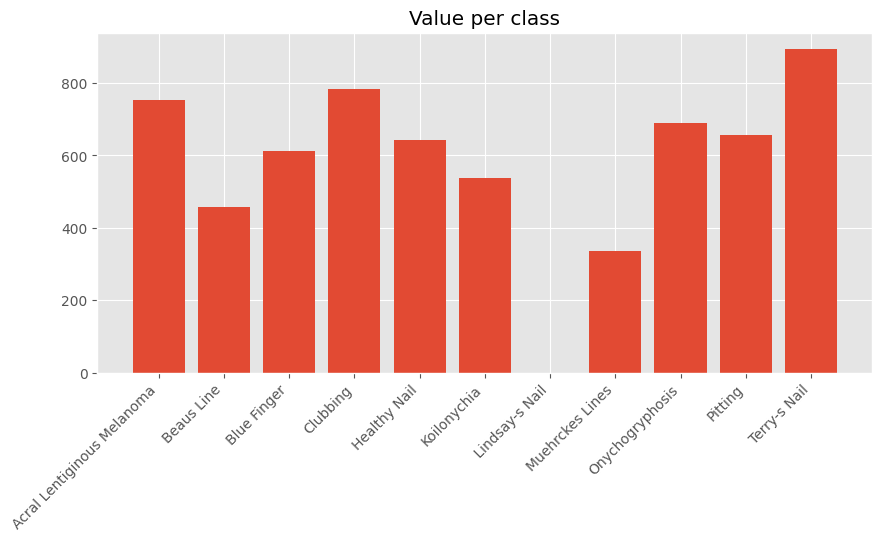

In [19]:
plotCountVal(df_train)

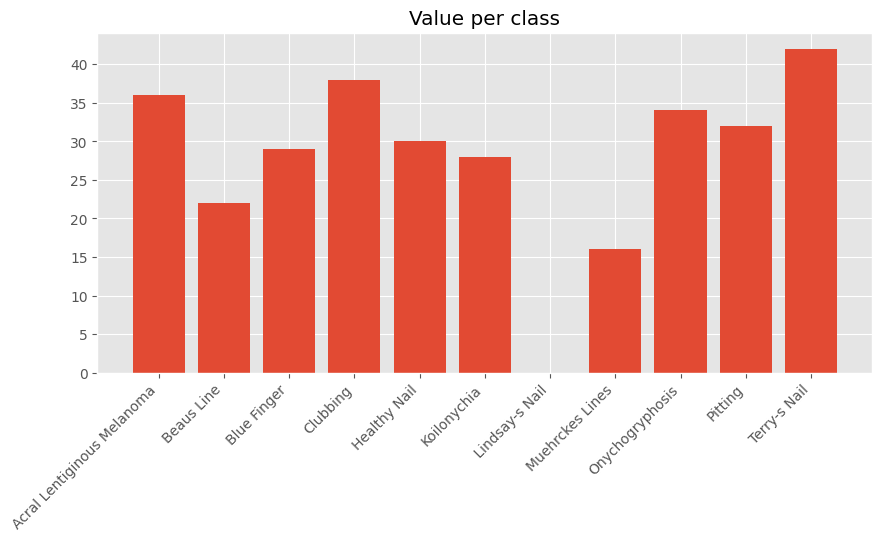

In [20]:
plotCountVal(df_test)

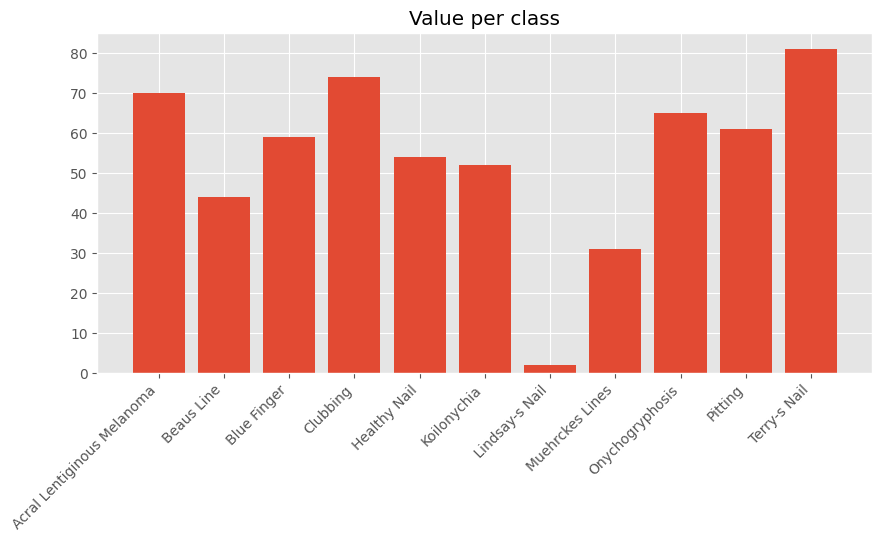

In [21]:
plotCountVal(df_validation)

In [22]:
for df in dataframe:
    df.drop([' Lindsay-s Nail'], axis=1, inplace=True)

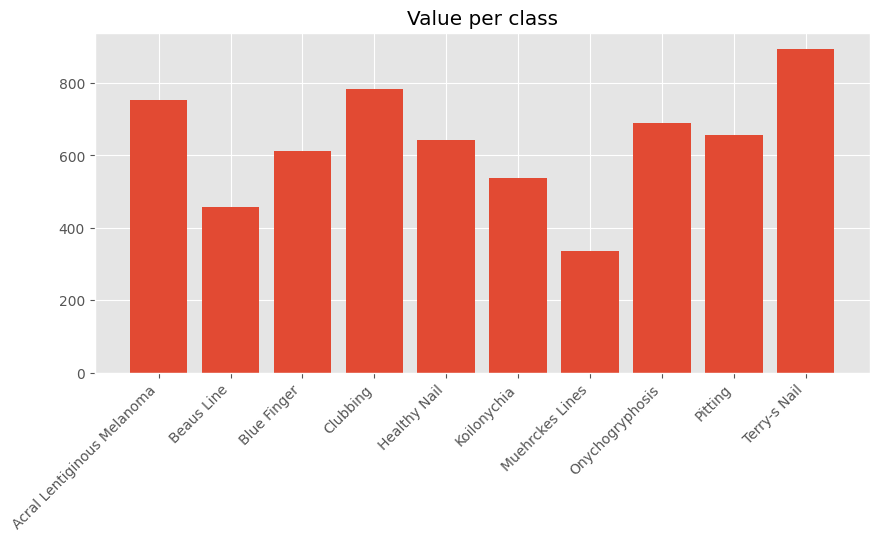

In [23]:
plotCountVal(df_train)

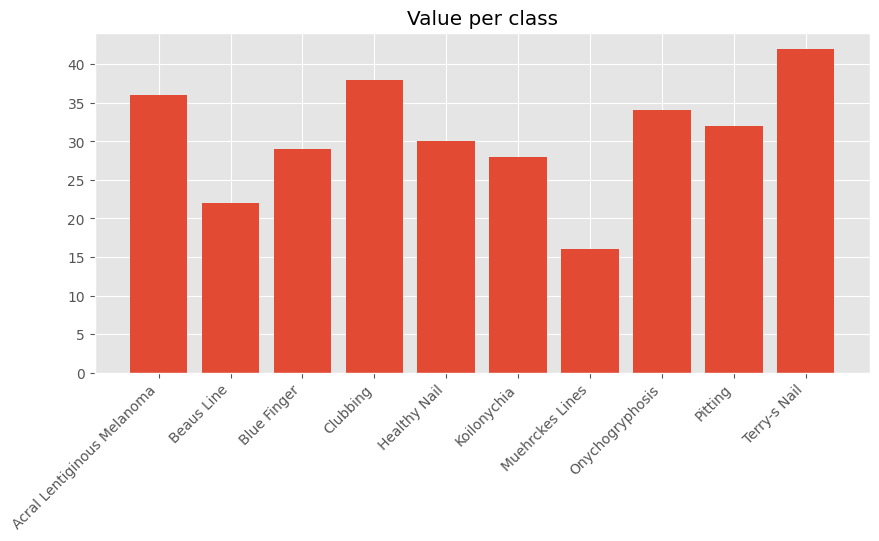

In [24]:
plotCountVal(df_test)

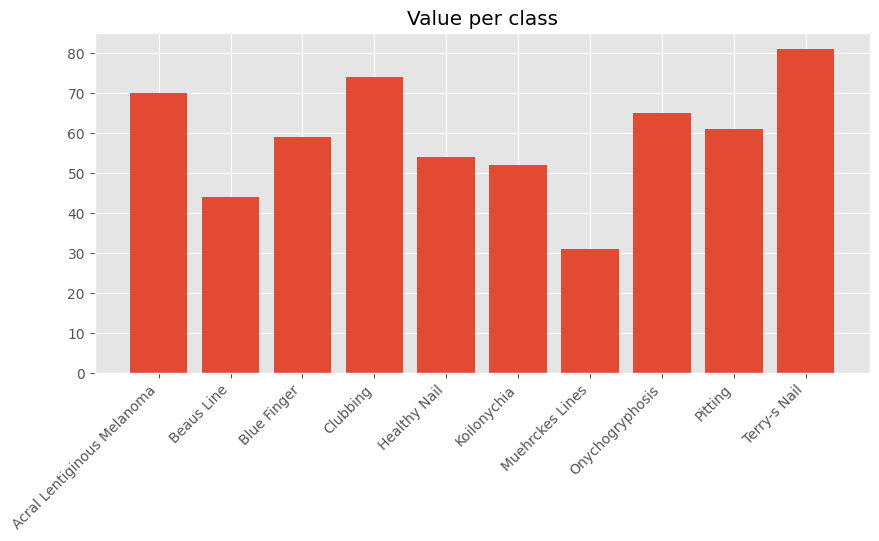

In [25]:
plotCountVal(df_validation)

In [26]:
dataset_path = ["./Dataset/train", "./Dataset/test", "./Dataset/valid"]
classes_name = df_train.columns[1:]
for data in dataset_path:
    for classname in classes_name:
        if not os.path.exists(os.path.join(data, classname)):
            os.makedirs(os.path.join(data, classname))

In [27]:
df_train.columns

Index(['filename', 'Acral Lentiginous Melanoma', 'Beaus Line', 'Blue Finger',
       'Clubbing', 'Healthy Nail', 'Koilonychia', 'Muehrckes Lines',
       'Onychogryphosis', 'Pitting', 'Terry-s Nail'],
      dtype='object')

In [28]:
df_train.columns[1:]

Index(['Acral Lentiginous Melanoma', 'Beaus Line', 'Blue Finger', 'Clubbing',
       'Healthy Nail', 'Koilonychia', 'Muehrckes Lines', 'Onychogryphosis',
       'Pitting', 'Terry-s Nail'],
      dtype='object')

In [29]:
df_train[df_train['Beaus Line']==1]["filename"]

13      Screen-Shot-2021-11-22-at-1-00-27-PM_png.rf.84...
19      beaus-lines_jpg.rf.8501a227ed053c284779409fd01...
39      Screen-Shot-2021-11-22-at-2-14-16-PM_png.rf.86...
53      Screen-Shot-2021-11-17-at-2-27-45-PM_png.rf.86...
64      Screen-Shot-2021-11-22-at-1-01-22-PM_png.rf.86...
                              ...                        
6332    Screen-Shot-2021-11-22-at-12-34-46-PM_png.rf.1...
6339    Screen-Shot-2021-11-22-at-1-25-05-PM_png.rf.18...
6347    Screen-Shot-2021-11-22-at-12-39-34-PM_png.rf.1...
6354    Screen-Shot-2021-11-22-at-2-07-54-PM_png.rf.19...
6359    Screen-Shot-2021-11-22-at-12-26-29-PM_png.rf.1...
Name: filename, Length: 456, dtype: object

"""column = df_train.columns[1:]
for col in column:
    files = df_train[df_train[col]==1]["filename"]
    print(f"{col}\n")
    for file in files:
        print(file)"""

files = df_train[df_train['Clubbing']==1]["filename"]
for file in files:
    source = f"./Data/train/{file}"
    destination = f"./Dataset/train/Clubbing/{file}"
    try:
        shutil.copy(source, destination)
        print("File copied successfully.")
 
    # If source and destination are same
    except shutil.SameFileError:
        print("Source and destination represents the same file.")
    
    # If there is any permission issue
    except PermissionError:
        print("Permission denied.")
    
    # For other errors
    except:
        print("Error occurred while copying file.")
        

In [30]:
column = df_train.columns[1:]
print(column)
print(column[1])

Index(['Acral Lentiginous Melanoma', 'Beaus Line', 'Blue Finger', 'Clubbing',
       'Healthy Nail', 'Koilonychia', 'Muehrckes Lines', 'Onychogryphosis',
       'Pitting', 'Terry-s Nail'],
      dtype='object')
Beaus Line


column = df_train.columns[1:]
for col in column:
    files = df_train[df_train[col]==1]["filename"]
    for file in files:
        source = f"./Data/train/{file}"
        destination = f"./Dataset/train/{col}/{file}"
        try:
            shutil.copy(source, destination)
            print("File copied successfully.")
    
        # If source and destination are same
        except shutil.SameFileError:
            print("Source and destination represents the same file.")
        
        # If there is any permission issue
        except PermissionError:
            print("Permission denied.")
        
        # For other errors
        except:
            print("Error occurred while copying file.")

In [31]:
def copyClasses(df):
    
    if df.equals(df_train):
        column = df.columns[1:]
        for col in column:
            files = df[df[col]==1]["filename"]
            for file in files:
                source = f"./Data/train/{file}"
                destination = f"./Dataset/train/{col}/{file}"
                try:
                    shutil.copy(source, destination)
                    print("File copied successfully.")
            
                # If source and destination are same
                except shutil.SameFileError:
                    print("Source and destination represents the same file.")
                
                # If there is any permission issue
                except PermissionError:
                    print("Permission denied.")
                
                # For other errors
                except:
                    print("Error occurred while copying file.")
    elif df.equals(df_test):
        column = df.columns[1:]
        for col in column:
            files = df[df[col]==1]["filename"]
            for file in files:
                source = f"./Data/test/{file}"
                destination = f"./Dataset/test/{col}/{file}"
                try:
                    shutil.copy(source, destination)
                    print("File copied successfully.")
            
                # If source and destination are same
                except shutil.SameFileError:
                    print("Source and destination represents the same file.")
                
                # If there is any permission issue
                except PermissionError:
                    print("Permission denied.")
                
                # For other errors
                except:
                    print("Error occurred while copying file.")
    elif df.equals(df_validation):
        column = df.columns[1:]
        for col in column:
            files = df[df[col]==1]["filename"]
            for file in files:
                source = f"./Data/valid/{file}"
                destination = f"./Dataset/valid/{col}/{file}"
                try:
                    shutil.copy(source, destination)
                    print("File copied successfully.")
            
                # If source and destination are same
                except shutil.SameFileError:
                    print("Source and destination represents the same file.")
                
                # If there is any permission issue
                except PermissionError:
                    print("Permission denied.")
                
                # For other errors
                except:
                    print("Error occurred while copying file.")

In [32]:
copyClasses(df_test)

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

In [33]:
copyClasses(df_train)

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

In [34]:
copyClasses(df_validation)

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 